In [1]:
# Path to the dump file
dump_file = 'clusters.dat'

# Function to read and process the dump file
def process_dump_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    timestep = None
    num_atoms = None
    box_bounds = []
    cluster_ids = []

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line == 'ITEM: TIMESTEP':
            i += 1
            timestep = int(lines[i].strip())
        elif line == 'ITEM: NUMBER OF ATOMS':
            i += 1
            num_atoms = int(lines[i].strip())
        elif line == 'ITEM: BOX BOUNDS pp pp pp':
            for _ in range(3):
                i += 1
                bounds = list(map(float, lines[i].strip().split()))
                box_bounds.append(bounds)
        elif line == 'ITEM: ATOMS c_myClusters':
            i += 1
            while i < len(lines) and lines[i].strip().isdigit():
                cluster_ids.append(int(lines[i].strip()))
                i += 1
            continue
        i += 1

    return timestep, num_atoms, box_bounds, cluster_ids

# Function to analyze the cluster data
def analyze_clusters(cluster_ids):
    from collections import Counter
    cluster_count = Counter(cluster_ids)
    num_clusters = len(cluster_count)
    clusters_info = dict(cluster_count)
    
    return num_clusters, clusters_info

# Main execution
timestep, num_atoms, box_bounds, cluster_ids = process_dump_file(dump_file)
num_clusters, clusters_info = analyze_clusters(cluster_ids)

# Output the results
print(f"Timestep: {timestep}")
print(f"Number of Atoms: {num_atoms}")
print(f"Box Bounds: {box_bounds}")
print(f"Number of Clusters: {num_clusters}")
print("Clusters Info (Cluster ID: Number of Atoms):")
for cluster_id, count in clusters_info.items():
    print(f"  Cluster {cluster_id}: {count} atoms")



Timestep: 7340000
Number of Atoms: 1000
Box Bounds: [[0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0], [0.0, 50.0]

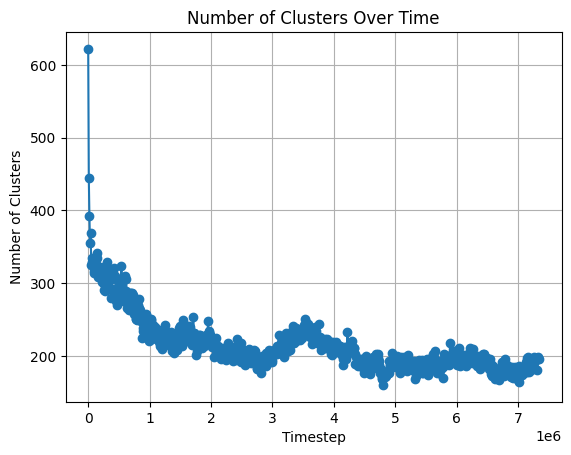

In [2]:
import matplotlib.pyplot as plt

def process_dump_file(file_path):
    """
    Read and process the dump file.

    Args:
        file_path (str): Path to the dump file.

    Returns:
        dict: A dictionary where keys are time steps (int) and values are tuples containing num_atoms (int), box_bounds (list), and cluster_ids (list).
    """
    timestep_data = {}
    current_timestep = None
    i = 0

    with open(file_path, 'r') as file:
        lines = file.readlines()

    while i < len(lines):
        line = lines[i].strip()
        if line == 'ITEM: TIMESTEP':
            i += 1
            current_timestep = int(lines[i].strip())
        elif line == 'ITEM: NUMBER OF ATOMS':
            i += 1
            num_atoms = int(lines[i].strip())
        elif line == 'ITEM: BOX BOUNDS pp pp pp':
            box_bounds = []
            for _ in range(3):
                i += 1
                bounds = list(map(float, lines[i].strip().split()))
                box_bounds.append(bounds)
        elif line == 'ITEM: ATOMS c_myClusters':
            i += 1
            cluster_ids = []
            while i < len(lines) and lines[i].strip().isdigit():
                cluster_ids.append(int(lines[i].strip()))
                i += 1
            timestep_data[current_timestep] = (num_atoms, box_bounds, cluster_ids)
            continue
        i += 1

    return timestep_data


def analyze_clusters(cluster_ids):
    """
    Analyze the cluster data.

    Args:
        cluster_ids (list): List of cluster IDs.

    Returns:
        tuple: A tuple containing num_clusters (int) and clusters_info (dict).
    """
    from collections import Counter
    cluster_count = Counter(cluster_ids)
    num_clusters = len(cluster_count)
    clusters_info = dict(cluster_count)
    
    return num_clusters, clusters_info

# Main execution
if __name__ == "__main__":
    dump_file = 'clusters.dat'
    timestep_data = process_dump_file(dump_file)

    timesteps = []
    num_clusters_list = []

    for timestep, data in timestep_data.items():
        timesteps.append(timestep)
        _, _, cluster_ids = data
        num_clusters, _ = analyze_clusters(cluster_ids)
        num_clusters_list.append(num_clusters)

    plt.plot(timesteps, num_clusters_list, marker='o')
    plt.xlabel('Timestep')
    plt.ylabel('Number of Clusters')
    plt.title('Number of Clusters Over Time')
    plt.grid(True)
    plt.show()


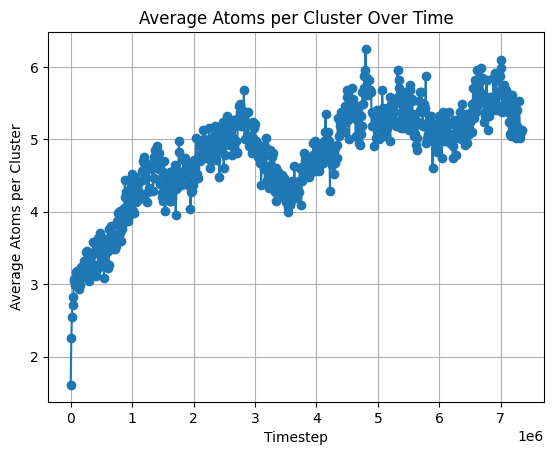

In [3]:
import matplotlib.pyplot as plt

def process_dump_file(file_path):
    """
    Read and process the dump file.

    Args:
        file_path (str): Path to the dump file.

    Returns:
        dict: A dictionary where keys are time steps (int) and values are lists containing cluster_ids.
    """
    timestep_data = {}
    current_timestep = None

    with open(file_path, 'r') as file:
        lines = file.readlines()

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line == 'ITEM: TIMESTEP':
            i += 1
            current_timestep = int(lines[i].strip())
            timestep_data[current_timestep] = []
        elif line == 'ITEM: ATOMS c_myClusters':
            i += 1
            clusters = []
            while i < len(lines) and lines[i].strip().isdigit():
                clusters.append(int(lines[i].strip()))
                i += 1
            timestep_data[current_timestep] = clusters
        else:
            i += 1

    return timestep_data

def analyze_clusters(timestep_data):
    """
    Analyze the cluster data.

    Args:
        timestep_data (dict): Dictionary containing cluster data for each timestep.

    Returns:
        list: A list containing the average number of atoms per cluster for each timestep.
    """
    average_atoms_per_cluster_list = []

    for timestep, cluster_ids in timestep_data.items():
        if cluster_ids:
            total_atoms = len(cluster_ids)
            total_clusters = len(set(cluster_ids))
            average_atoms_per_cluster = total_atoms / total_clusters
        else:
            average_atoms_per_cluster = 0
        average_atoms_per_cluster_list.append(average_atoms_per_cluster)

    return average_atoms_per_cluster_list

# Main execution
if __name__ == "__main__":
    dump_file = 'clusters.dat'
    timestep_data = process_dump_file(dump_file)

    average_atoms_per_cluster_list = analyze_clusters(timestep_data)

    # Plotting
    timesteps = list(timestep_data.keys())
    plt.plot(timesteps, average_atoms_per_cluster_list, marker='o')
    plt.xlabel('Timestep')
    plt.ylabel('Average Atoms per Cluster')
    plt.title('Average Atoms per Cluster Over Time')
    plt.grid(True)
    plt.show()


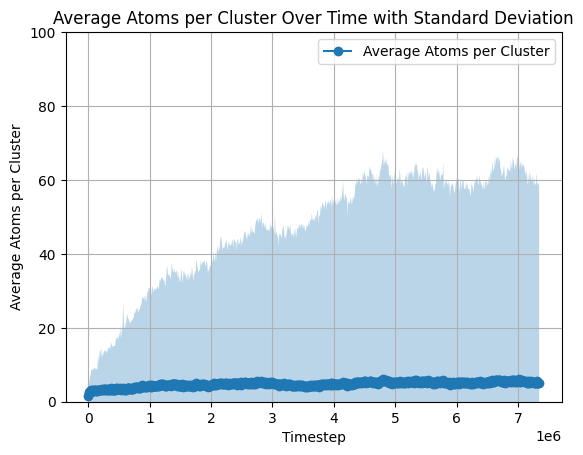

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def process_dump_file(file_path):
    """
    Read and process the dump file.

    Args:
        file_path (str): Path to the dump file.

    Returns:
        dict: A dictionary where keys are time steps (int) and values are lists containing cluster_ids.
    """
    timestep_data = {}
    current_timestep = None

    with open(file_path, 'r') as file:
        lines = file.readlines()

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line == 'ITEM: TIMESTEP':
            i += 1
            current_timestep = int(lines[i].strip())
            timestep_data[current_timestep] = []
        elif line == 'ITEM: ATOMS c_myClusters':
            i += 1
            clusters = []
            while i < len(lines) and lines[i].strip().isdigit():
                clusters.append(int(lines[i].strip()))
                i += 1
            timestep_data[current_timestep] = clusters
        else:
            i += 1

    return timestep_data

def analyze_clusters(timestep_data):
    """
    Analyze the cluster data.

    Args:
        timestep_data (dict): Dictionary containing cluster data for each timestep.

    Returns:
        tuple: A tuple containing a list of average number of atoms per cluster and a list of standard deviations.
    """
    average_atoms_per_cluster_list = []
    std_list = []

    for timestep, cluster_ids in timestep_data.items():
        if cluster_ids:
            total_atoms = len(cluster_ids)
            total_clusters = len(set(cluster_ids))
            average_atoms_per_cluster = total_atoms / total_clusters
            average_atoms_per_cluster_list.append(average_atoms_per_cluster)
            std_list.append(np.std([cluster_ids.count(cluster_id) for cluster_id in set(cluster_ids)]))
        else:
            average_atoms_per_cluster_list.append(0)
            std_list.append(0)

    return average_atoms_per_cluster_list, std_list

# Main execution
if __name__ == "__main__":
    dump_file = 'clusters.dat'
    timestep_data = process_dump_file(dump_file)

    average_atoms_per_cluster_list, std_list = analyze_clusters(timestep_data)

    # Plotting
    timesteps = list(timestep_data.keys())
    plt.plot(timesteps, average_atoms_per_cluster_list, marker='o', label='Average Atoms per Cluster')
    plt.fill_between(timesteps, [avg - std for avg, std in zip(average_atoms_per_cluster_list, std_list)],
                     [avg + std for avg, std in zip(average_atoms_per_cluster_list, std_list)], alpha=0.3)
    plt.xlabel('Timestep')
    plt.ylim(0,100)
    plt.ylabel('Average Atoms per Cluster')
    plt.title('Average Atoms per Cluster Over Time with Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()


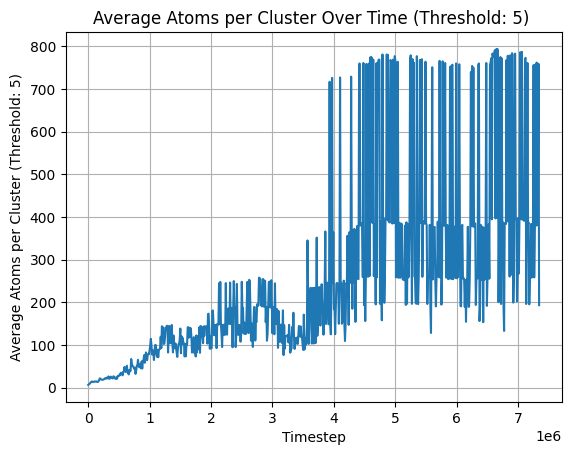

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def process_dump_file(file_path):
    """
    Read and process the dump file.

    Args:
        file_path (str): Path to the dump file.

    Returns:
        dict: A dictionary where keys are time steps (int) and values are lists containing cluster_ids.
    """
    timestep_data = {}
    current_timestep = None

    with open(file_path, 'r') as file:
        lines = file.readlines()

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line == 'ITEM: TIMESTEP':
            i += 1
            current_timestep = int(lines[i].strip())
            timestep_data[current_timestep] = []
        elif line == 'ITEM: ATOMS c_myClusters':
            i += 1
            clusters = []
            while i < len(lines) and lines[i].strip().isdigit():
                clusters.append(int(lines[i].strip()))
                i += 1
            timestep_data[current_timestep] = clusters
        else:
            i += 1

    return timestep_data

def analyze_clusters(timestep_data, threshold=5):
    """
    Analyze the cluster data.

    Args:
        timestep_data (dict): Dictionary containing cluster data for each timestep.
        threshold (int): Minimum number of atoms per cluster to consider for computing the average.

    Returns:
        tuple: A tuple containing a list of average number of atoms per cluster and a list of standard deviations.
    """
    average_atoms_per_cluster_list = []
    std_list = []

    for timestep, cluster_ids in timestep_data.items():
        if cluster_ids:
            atoms_per_cluster = [cluster_ids.count(cluster_id) for cluster_id in set(cluster_ids)]
            filtered_atoms_per_cluster = [atoms for atoms in atoms_per_cluster if atoms >= threshold]
            if filtered_atoms_per_cluster:
                average_atoms_per_cluster = np.mean(filtered_atoms_per_cluster)
                std = np.std(filtered_atoms_per_cluster)
                average_atoms_per_cluster_list.append(average_atoms_per_cluster)
                std_list.append(std)
            else:
                average_atoms_per_cluster_list.append(0)
                std_list.append(0)
        else:
            average_atoms_per_cluster_list.append(0)
            std_list.append(0)

    return average_atoms_per_cluster_list, std_list

# Main execution
if __name__ == "__main__":
    dump_file = 'clusters.dat'
    timestep_data = process_dump_file(dump_file)

    average_atoms_per_cluster_list, std_list = analyze_clusters(timestep_data)

    # Plotting
    timesteps = list(timestep_data.keys())
    plt.errorbar(timesteps, average_atoms_per_cluster_list)
    plt.xlabel('Timestep')
    plt.ylabel('Average Atoms per Cluster (Threshold: 5)')
    plt.title('Average Atoms per Cluster Over Time (Threshold: 5) ')
    plt.grid(True)
    plt.show()
